# Exercise 02

## Time Series Analysis

- The result will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

# 02.1 Find the values of rho for which a series becomes non-stationary. rho between 0 and 1 ([0,1]) \n",
`X(t) = Rho * X(t-1) + Er(t)`

In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

def ts(rho):
    ts = pd.Series(np.random.rand(200) - 0.5, index=pd.date_range("2020-01-01", periods=200))
    
    for i in range(1, ts.shape[0]):
        ts.iloc[i] = ts.iloc[i] + rho * ts.iloc[i-1]    
    return ts

rho_valor=[0.8,0.9,0.92,0.93,0.95,0.99]

for i in rho_valor:
    ts1 = ts(i)
    result = adfuller(ts1)
    print('rho: '+str(i))
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print()

rho: 0.8
ADF Statistic: -4.905515
p-value: 0.000034

rho: 0.9
ADF Statistic: -3.865819
p-value: 0.002301

rho: 0.92
ADF Statistic: -3.869342
p-value: 0.002272

rho: 0.93
ADF Statistic: -4.112848
p-value: 0.000922

rho: 0.95
ADF Statistic: -2.509499
p-value: 0.113180

rho: 0.99
ADF Statistic: -0.767507
p-value: 0.828481



Podemos observar que a medida que el valor rho se acerca a 1, el p-valor deja de ser significativo y, por tanto, la serie deja de ser estacionaria.

# 02.2 Download and explore one series from google trends

In [5]:
df = pd.read_csv('GoogleTrends.csv', skiprows=1)
df.head()

FileNotFoundError: [Errno 2] File GoogleTrends.csv does not exist: 'GoogleTrends.csv'

Elegimos los terminos de búsqueda 'Navidad' y 'Gift' en todo el mundo para el periodo 2004-hoy

In [3]:
df.columns = ['month', 'navidad', 'gift']
df.head()

,month,navidad,gift
0,2004-01,5,19
1,2004-02,1,21
2,2004-03,1,17
3,2004-04,1,19
4,2004-05,1,20


In [4]:
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)

df.head()

,navidad,gift
month,,
2004-01-01,5,19
2004-02-01,1,21
2004-03-01,1,17
2004-04-01,1,19
2004-05-01,1,20


### Graficación series de tiempo

A continuación graficamos ambas series de tiempo, donde podemos observar graficamente estacionalidad para el mismo periodo de tiempo.

In [2]:
import matplotlib.pyplot as plt
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

NameError: name 'df' is not defined

### Medias móviles

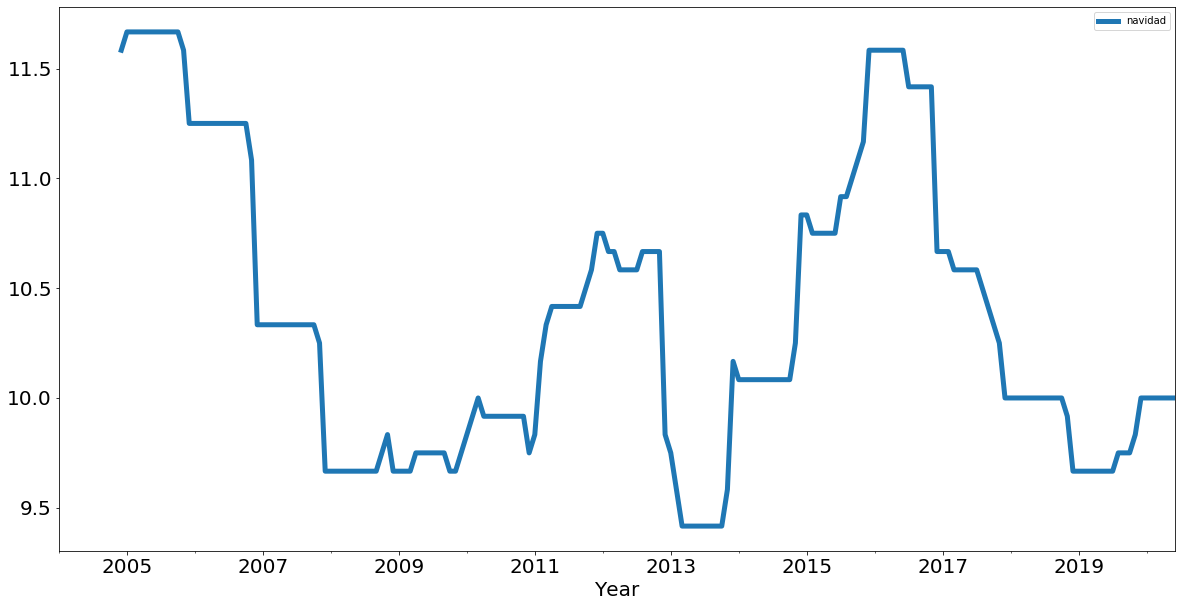

In [7]:
navidad = df[['navidad']]
navidad.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

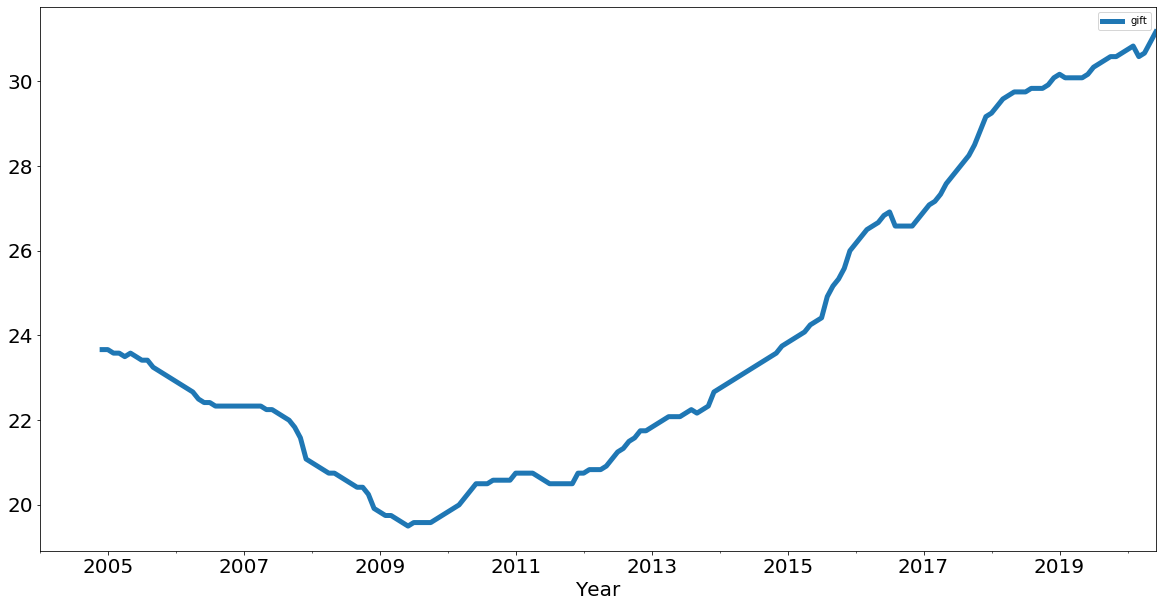

In [8]:
gift = df[['gift']]
gift.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Al eliminar la tendencia es posible ver con mayor claridad los picos en diciembre de cada año para ambas series.

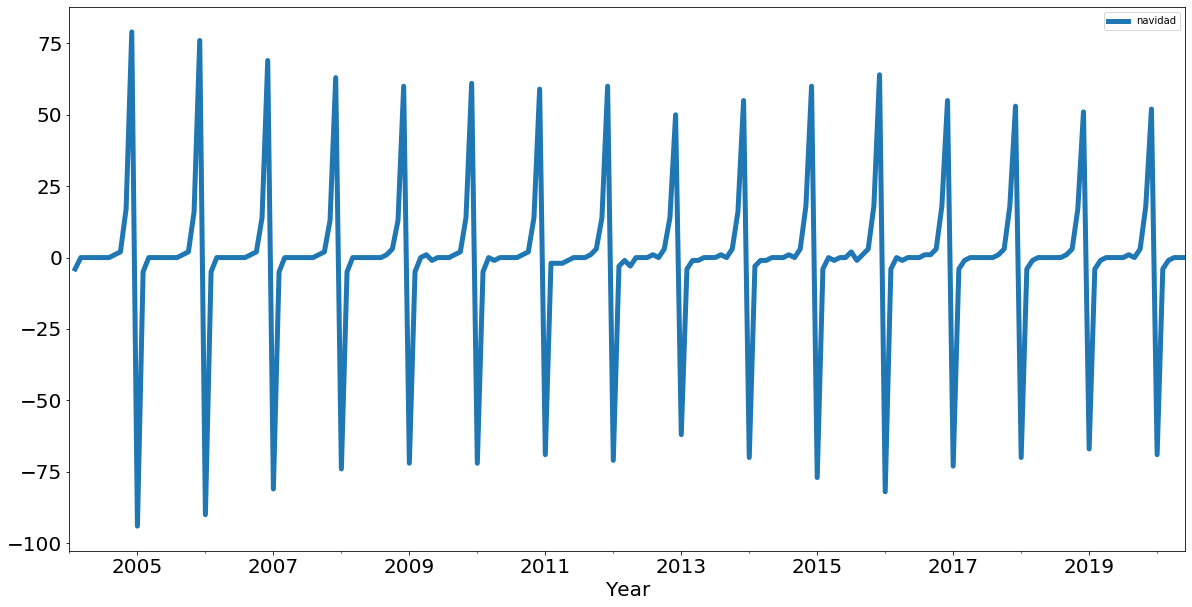

In [9]:
navidad.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

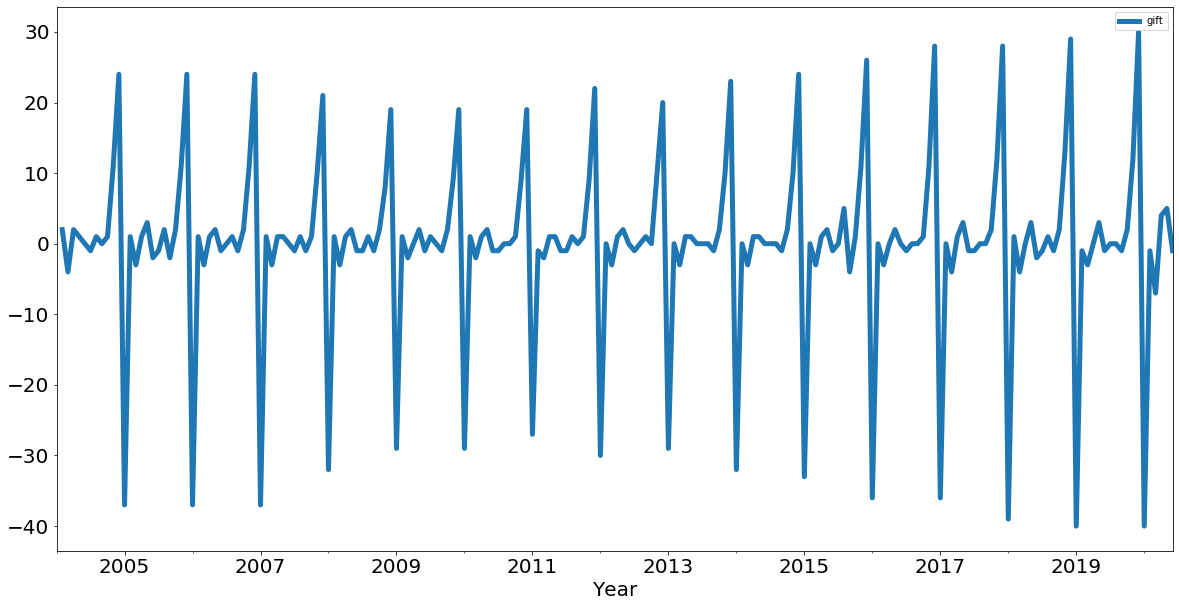

In [10]:
gift.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

### Revisión estacionaridad

<b>Navidad</b>

A continuación podemos observar que al utilizar las series con diferencias de primer grado obtenemos series estacionarias de acuerdo con el Dickey Fuller Test of Stationarity

In [15]:
result = adfuller(df['navidad'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.311083
p-value: 0.168418
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


In [16]:
result = adfuller(df['navidad'].diff().iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.664210
p-value: 0.000000
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


<b>Gift</b>

In [17]:
result = adfuller(df['gift'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.665372
p-value: 0.989121
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575


In [18]:
result = adfuller(df['gift'].diff().iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.810853
p-value: 0.056740
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575


### Periodicidad y autocorrelación

Podemos observar una alta correlación entre los terminos Navidad y Gift, la cual es aun más alta para la correlación de las diferencias.

In [19]:
df.corr()

,navidad,gift
navidad,1.000000,0.916715
gift,0.916715,1.000000


In [20]:
df.diff().corr()

,navidad,gift
navidad,1.000000,0.971541
gift,0.971541,1.000000


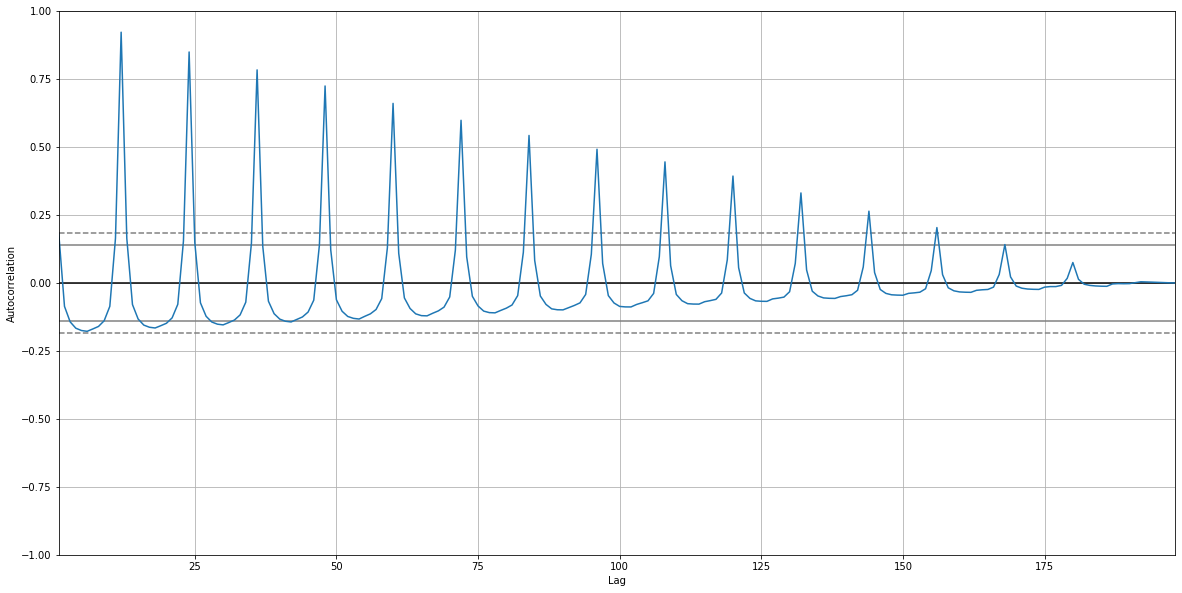

In [21]:
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(navidad);

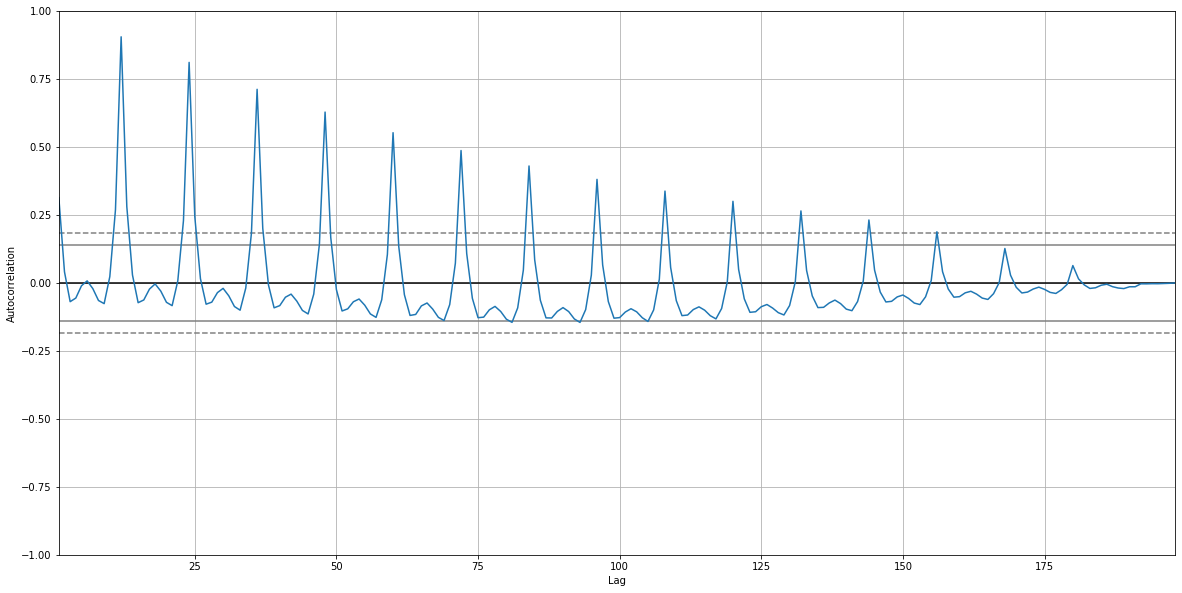

In [22]:
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(gift);

A partir de los gráficos de autocorrelación podemos observar que para ambas series de tiempo la estacionalidad es de 12 meses.